<a href="https://colab.research.google.com/github/SnSabu/Machine-Learning-Projects/blob/main/Distance%20Between%20Two%20GeoLocations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Shortest Distance Calculation between two points on the Earth's Surface**


> By Sneha Sabu



In this notebook, I will calculate the distance between two locations using two methods: 



1.   Geodistance: Geodistance refers to the measurement of the distance between two points on the surface of the Earth, taking into account the Earth's curvature. The geopy library is used for this calculation.
2.   Road Distance



In [ ]:
import pandas as pd # to load cities dataset
from geopy import distance # to calculate distance on the surface

In [ ]:
# load the dataframe with capitals
df = pd.read_csv("/concap.csv")

# rename so that the column names are shorter and comply with PEP-8
df.rename(columns={"CountryName": "Country", "CapitalName": "capital", "CapitalLatitude": "lat", "CapitalLongitude": "lon", "CountryCode": "code", "ContinentName": "continent"}, inplace=True)
df.sample(3)

,Country,capital,lat,lon,code,continent
22,Azerbaijan,Baku,40.383333,49.866667,AZ,Europe
156,Nicaragua,Managua,12.133333,-86.250000,NI,Central America
135,Malaysia,Kuala Lumpur,3.166667,101.700000,MY,Asia


In [ ]:
# to start with let's filter only 2 capitals. Rome and Paris.
ropa = df[df["capital"].isin(["Rome","Paris"])].reset_index()
ropa

,index,Country,capital,lat,lon,code,continent
0,81,France,Paris,48.866667,2.333333,FR,Europe
1,110,Italy,Rome,41.900000,12.483333,IT,Europe


In [ ]:
d = distance.distance((ropa.loc[0, "lat"], ropa.loc[0, "lon"]), (ropa.loc[1, "lat"], ropa.loc[1, "lon"]))
d, d.km, d.miles

(Distance(1107.8818760940028), 1107.8818760940028, 688.4058822066647)

In [ ]:
results = []
for f in [distance.distance, distance.great_circle, distance.geodesic]:
    for mes in ["kilometers","km","miles","mi","nautical","nm","feet","ft"]:
        d = f((ropa.loc[0, "lat"], ropa.loc[0, "lon"]), (ropa.loc[1, "lat"], ropa.loc[1, "lon"]))
        results.append({"method": f.__name__, "measurement": mes, "value": getattr(d, mes)})

# show as dataframe
results_df = pd.DataFrame(results)
results_df.pivot_table(index="method", columns="measurement", values="value")


measurement,feet,ft,kilometers,km,mi,miles,nautical,nm
method,,,,,,,,
geodesic,3.634783e+06,3.634783e+06,1107.881876,1107.881876,688.405882,688.405882,598.208356,598.208356
great_circle,3.630457e+06,3.630457e+06,1106.563205,1106.563205,687.586498,687.586498,597.496331,597.496331


**Shortest Distance between two Locations on Road**

The osmnx library and OpenStreetMap (OSM) data is used to create a graph representation of the road network, and find the shortest routes between two points based on distance and travel time.

In [ ]:
!pip install osmnx

In [ ]:
!pip install networkx
!pip install datetime

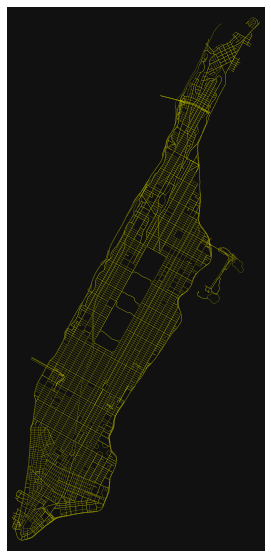

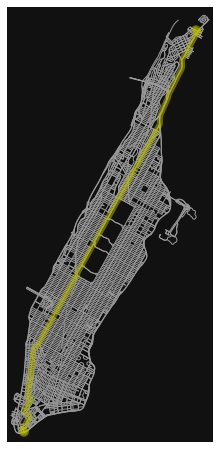

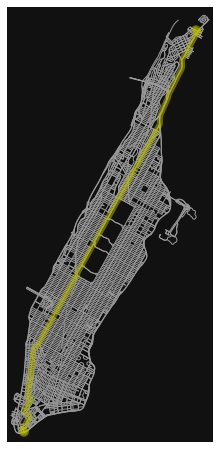

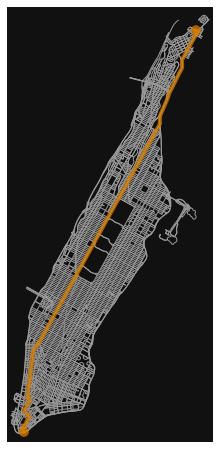

1362.9999999999998
0:22:43
21409.764000000017
21.409764000000017


In [ ]:
import numpy
import osmnx as ox
import networkx as nx
from datetime import timedelta


# The place where your 2 points are located. It will be used to create a graph from the OSM data
# In this example, the 2 points are two addresses in Manhattan, so we choose "Manhattan"
# It could be a bounding box too, or an area around a point
graph_area = ("Manhattan, New York, USA")

# Create the graph of the area from OSM data. It will download the data and create the graph
G = ox.graph_from_place(graph_area, network_type='drive')

# OSM data are sometime incomplete so we use the speed module of osmnx to add missing edge speeds and travel times
G = ox.add_edge_speeds(G)
G = ox.add_edge_travel_times(G)

# Save graph to disk if you want to reuse it
ox.save_graphml(G, "Manhattan.graphml")

# Load the graph
#G = ox.load_graphml("Manhattan.graphml")

# Plot the graph
fig, ax = ox.plot_graph(G, figsize=(10, 10), node_size=0, edge_color='y', edge_linewidth=0.2)

# Two pairs of (lat,lng) coordinates
origin_coordinates = (40.70195053163349, -74.01123198479581)
destination_coordinates = (40.87148739347057, -73.91517498611597)

# If you want to take an address (osmx will use Nominatim service for this)
# origin_coordinates = ox.geocode("2 Broad St, New York, NY 10005")

# In the graph, get the nodes closest to the points

origin_node = ox.distance.nearest_nodes(G, origin_coordinates[1],
                                      origin_coordinates[0])
destination_node = ox.distance.nearest_nodes(G, destination_coordinates[1],
                                      destination_coordinates[0])


# Get the shortest route by distance
shortest_route_by_distance = ox.shortest_path(G, origin_node, destination_node, weight='length')

# Plot the shortest route by distance
fig, ax = ox.plot_graph_route(G, shortest_route_by_distance, route_color='y', route_linewidth=6, node_size=0)

# Get the shortest route by travel time
shortest_route_by_travel_time = ox.shortest_path(G, origin_node, destination_node, weight='length')

# Plot the shortest route by travel time
fig, ax = ox.plot_graph_route(G, shortest_route_by_travel_time, route_color='y', route_linewidth=6, node_size=0)

# Plot the 2 routes
fig, ax = ox.plot_graph_routes(G, routes=[shortest_route_by_distance, shortest_route_by_travel_time], route_colors=['r', 'y'], route_linewidth=6, node_size=0)

# Get the travel time, in seconds
# Note here that we use "nx" (networkx), not "ox" (osmnx)
travel_time_in_seconds = nx.shortest_path_length(G, origin_node, destination_node, weight='travel_time')
print(travel_time_in_seconds)

#The travel time in "HOURS:MINUTES:SECONDS" format
travel_time_in_hours_minutes_seconds = str(timedelta(seconds=travel_time_in_seconds))
print(travel_time_in_hours_minutes_seconds)

# Get the distance in meters
distance_in_meters = nx.shortest_path_length(G, origin_node, destination_node, weight='length')
print(distance_in_meters)
# Distance in kilometers
distance_in_kilometers = distance_in_meters / 1000
print(distance_in_kilometers)

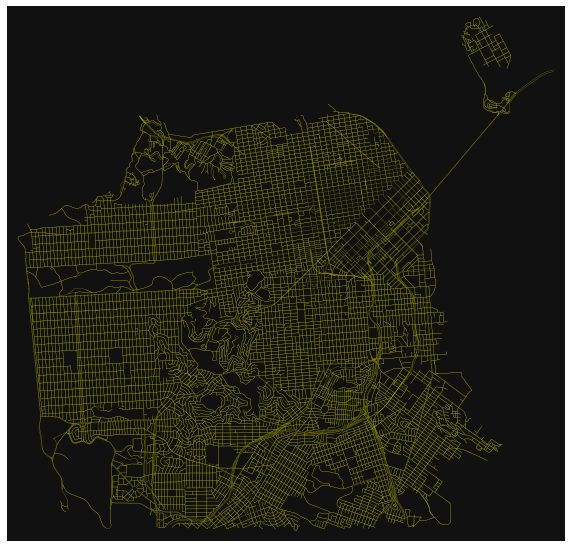

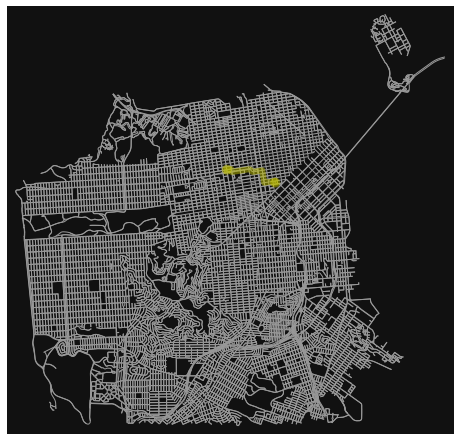

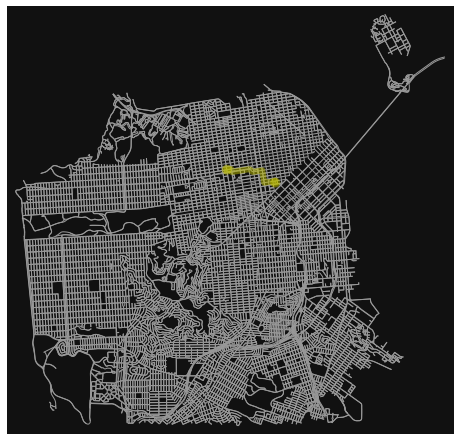

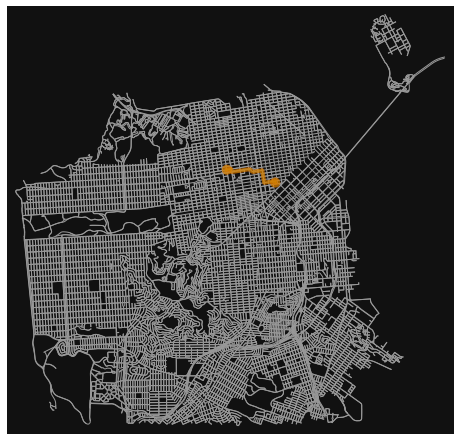

189.79999999999998
0:03:09.800000
2148.6909999999993
2.1486909999999995


In [ ]:
import numpy
import osmnx as ox
import networkx as nx
from datetime import timedelta


# The place where your 2 points are located. It will be used to create a graph from the OSM data
# In this example, the 2 points are two addresses in Manhattan, so we choose "Manhattan"
# It could be a bounding box too, or an area around a point
graph_area = ("San Francisco, California, USA")

# Create the graph of the area from OSM data. It will download the data and create the graph
G = ox.graph_from_place(graph_area, network_type='drive')

# OSM data are sometime incomplete so we use the speed module of osmnx to add missing edge speeds and travel times
G = ox.add_edge_speeds(G)
G = ox.add_edge_travel_times(G)

# Save graph to disk if you want to reuse it
ox.save_graphml(G, "SF.graphml")

# Load the graph
#G = ox.load_graphml("SF.graphml")

# Plot the graph
fig, ax = ox.plot_graph(G, figsize=(10, 10), node_size=0, edge_color='y', edge_linewidth=0.2)

# Two pairs of (lat,lng) coordinates
origin_coordinates = (37.78497,-122.43327)
destination_coordinates = (37.78071,-122.41445)

# If you want to take an address (osmx will use Nominatim service for this)
# origin_coordinates = ox.geocode("2 Broad St, New York, NY 10005")

# In the graph, get the nodes closest to the points

origin_node = ox.distance.nearest_nodes(G, origin_coordinates[1],
                                      origin_coordinates[0])
destination_node = ox.distance.nearest_nodes(G, destination_coordinates[1],
                                      destination_coordinates[0])


# Get the shortest route by distance
shortest_route_by_distance = ox.shortest_path(G, origin_node, destination_node, weight='length')

# Plot the shortest route by distance
fig, ax = ox.plot_graph_route(G, shortest_route_by_distance, route_color='y', route_linewidth=6, node_size=0)

# Get the shortest route by travel time
shortest_route_by_travel_time = ox.shortest_path(G, origin_node, destination_node, weight='length')

# Plot the shortest route by travel time
fig, ax = ox.plot_graph_route(G, shortest_route_by_travel_time, route_color='y', route_linewidth=6, node_size=0)

# Plot the 2 routes
fig, ax = ox.plot_graph_routes(G, routes=[shortest_route_by_distance, shortest_route_by_travel_time], route_colors=['r', 'y'], route_linewidth=6, node_size=0)

# Get the travel time, in seconds
# Note here that we use "nx" (networkx), not "ox" (osmnx)
travel_time_in_seconds = nx.shortest_path_length(G, origin_node, destination_node, weight='travel_time')
print(travel_time_in_seconds)

#The travel time in "HOURS:MINUTES:SECONDS" format
travel_time_in_hours_minutes_seconds = str(timedelta(seconds=travel_time_in_seconds))
print(travel_time_in_hours_minutes_seconds)

# Get the distance in meters
distance_in_meters = nx.shortest_path_length(G, origin_node, destination_node, weight='length')
print(distance_in_meters)
# Distance in kilometers
distance_in_kilometers = distance_in_meters / 1000
print(distance_in_kilometers)